<a href="https://colab.research.google.com/github/RizkyPutraKurniawan24/Machine-Learning/blob/master/Supervised%20Learning/Regression/Multiple%20Linear%20Regression%20with%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### **Import Dataset**

In [ ]:
#Import dataset
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('drive/MyDrive/All Datasets/[Machine Learning Algorithm]/Dataset Supervised Learning (Regression)/toyota.csv')

Mounted at /content/drive


### **Check Dataset**

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [ ]:
df['model'].unique()

array([' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
       ' Prius', ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO',
       ' Land Cruiser', ' Supra', ' Camry', ' Verso-S', ' IQ',
       ' Urban Cruiser'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [ ]:
df.shape

(6738, 9)

In [ ]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

### **Cleaning Dataset**

In [ ]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [ ]:
df.duplicated().sum()

39

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(6699, 9)

### **Exploratory Data Analysis (EDA)**

<ipython-input-12-68df51a515e4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

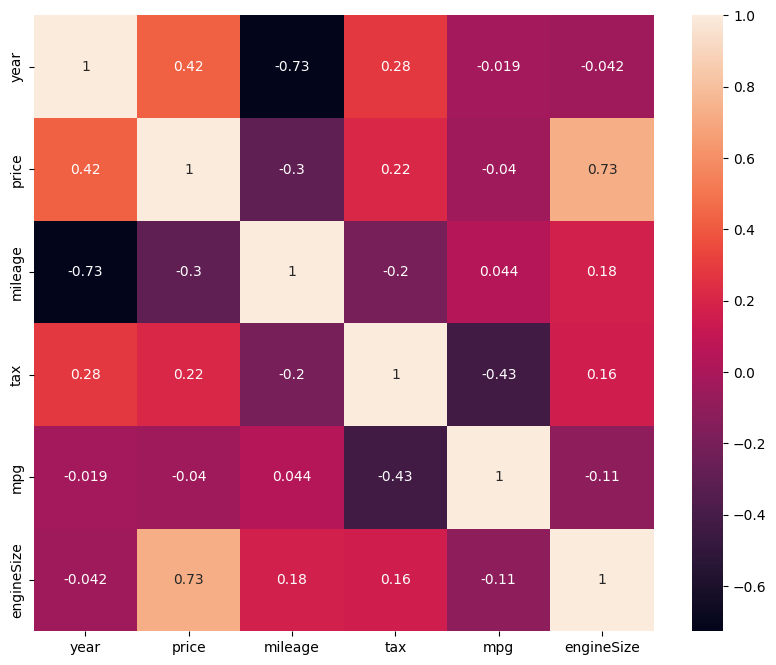

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

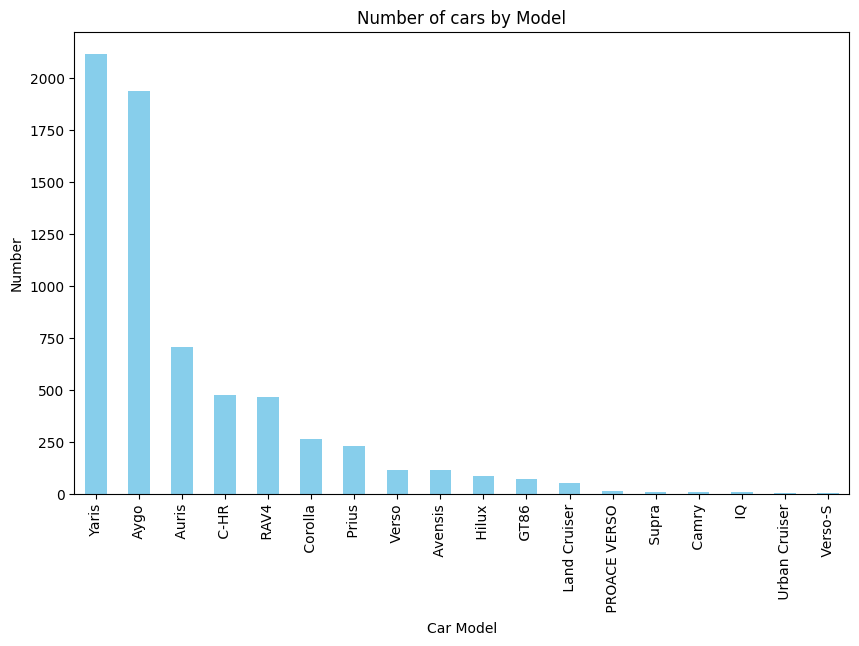

In [ ]:
total_car = df['model'].value_counts()

plt.figure(figsize=(10, 6))
total_car.plot(kind='bar', color='skyblue')
plt.xlabel('Car Model')
plt.ylabel('Number')
plt.title('Number of cars by Model')
plt.show()

<Figure size 1000x600 with 0 Axes>

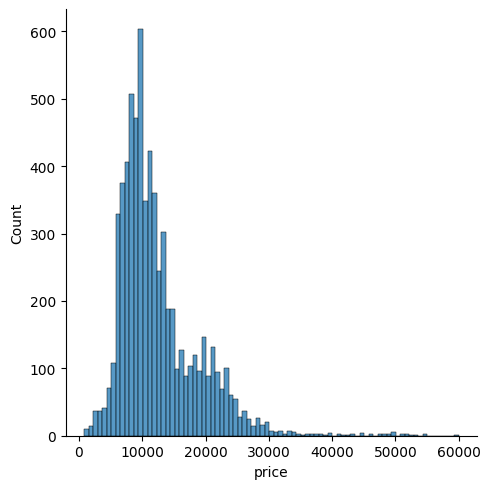

In [ ]:
plt.figure(figsize=(10, 6))
sns.displot(df['price'])

In [ ]:
# Change the currency (EURO's to Rupiah's)
currency_exchange_rate = 17045 # 1 Uero = 17.045 Rupiah

df['price'] = df['price'] * currency_exchange_rate
df['tax'] = df['tax'] * currency_exchange_rate

In [ ]:
df.sample(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
946,Yaris,2016,161893410,Manual,6849,Petrol,511350,55.0,1.3
4311,Aygo,2016,119229775,Manual,15023,Petrol,0,69.0,1.0
3544,Auris,2017,272549550,Automatic,24000,Hybrid,0,70.6,1.8
3916,Aygo,2014,93747500,Manual,37756,Petrol,0,69.0,1.0
3498,Auris,2015,230090455,Automatic,55715,Hybrid,0,70.6,1.8


### **Label Encoder**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6699 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6699 non-null   object 
 1   year          6699 non-null   int64  
 2   price         6699 non-null   int64  
 3   transmission  6699 non-null   object 
 4   mileage       6699 non-null   int64  
 5   fuelType      6699 non-null   object 
 6   tax           6699 non-null   int64  
 7   mpg           6699 non-null   float64
 8   engineSize    6699 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 523.4+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

model_encoder = LabelEncoder()
transmission_encoder = LabelEncoder()
fuelType_encoder = LabelEncoder()

df['model'] = model_encoder.fit_transform(df['model'])
df['transmission'] = transmission_encoder.fit_transform(df['transmission'])
df['fuelType'] = fuelType_encoder.fit_transform(df['fuelType'])

In [ ]:
df.sample(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1196,17,2019,221585000,1,3746,3,2471525,47.9,1.5
1282,17,2019,204454775,1,3991,3,2471525,47.9,1.5
3568,0,2015,229255250,0,17148,1,0,72.4,1.8
4653,2,2017,144797275,3,3906,3,2556750,67.0,1.0
3851,2,2017,132865775,1,7718,3,2471525,68.9,1.0


### **Preparation Data**

In [ ]:
# Split the dataset into features and target variable
X = df.drop('price', axis=1)# Features
y = df['price']# Target variable
X.shape , y.shape

((6699, 8), (6699,))

In [ ]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Creating the Model**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### **Make Predictions**

In [ ]:
# Making predictions
y_pred = model.predict(X_test)

In [ ]:
score = model.score(X_test, y_test)
print('Model Linear Regression Score :', score)

Model Linear Regression Score : 0.7909694669628701


### **Model Evaluation**

In [ ]:
# Evaluating the model
print('R-Squared :', r2_score(y_test, y_pred))
print('MAE :', metrics.mean_absolute_error(y_test, y_pred))
print('MSE :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Squared : 0.7909694669628701
MAE : 35284602.20154673
MSE : 2514121246875216.0
RMSE : 50141013.62034094


### **Testing New Data**

In [ ]:
New_Data = {
    'model' : ' Yaris',
    'year' : 2019,
    'transmission' : 'Automatic',
    'mileage' : 1401,
    'fuelType' : 'Petrol',
    'tax': 2385180,
    'mpg' : 76.3,
    'engineSize' : 1.5
}

input_df = pd.DataFrame([New_Data])

input_df['model'] = model_encoder.transform(input_df['model'])
input_df['transmission'] = transmission_encoder.transform(input_df['transmission'])
input_df['fuelType'] = fuelType_encoder.transform(input_df['fuelType'])

input_df

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,17,2019,0,1401,3,2385180,76.3,1.5


In [ ]:
prediction = model.predict(input_df)
prediction_formatted = round(prediction[0], 2)

print('Estimasi Harga Mobil [New_Data] Rp. ', prediction_formatted)

Estimasi Harga Mobil [New_Data] Rp.  264717514.92


### **Model Equation**

In [ ]:
# Coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-2.00862823e+06  1.38575526e+07 -4.49606234e+06 -1.39794863e+03
 -1.99201795e+06 -1.67092991e+00  1.67732339e+05  1.96972933e+08]
Intercept: -27975871905.167103


In [ ]:
# Extract the coefficients (slopes) and the intercept
coefficients = model.coef_
intercept = model.intercept_

# Extract feature names
feature_names = X.columns

# Create the equation string
equation = f"Y = {intercept:.2f} "
for i, coef in enumerate(coefficients):
    equation += f" + {coef:.2f} * {feature_names[i]}"

print("Multiple Linear Regression Equation:")
print(equation)

Multiple Linear Regression Equation:
Y = -27975871905.17  + -2008628.23 * model + 13857552.64 * year + -4496062.34 * transmission + -1397.95 * mileage + -1992017.95 * fuelType + -1.67 * tax + 167732.34 * mpg + 196972932.58 * engineSize
